#**Titanic Challenge on Kaggle. Machine Learning from Disaster.**
##Первые шаги в анализе данных и машинном обучении.

---


Меня зовут Золотов Роман, я студент 2-го курса СПбГЭТУ "ЛЭТИ" на момент 2025 года. Данной статьей я хочу войти в мир Машинного Обучения и решить первую, основополагающую задачу на сайте Kaggle, а так-же помочь тем, кто собирается заняться тем же.


---

<a href="https://www.kaggle.com/c/titanic/"> Titanic challenge</a> - Задача с платформы Kaggle. Суть задачи в предугадывании результата с лучшей точностью. Результат в данном случае - это состояние "жизни" пассажира: выжил ли он после крушения или нет.

Предугадывание основывается на анализе данных о других пассажирах. Данные будут состоять из возраста, пола, имени и т.д.

---


План действий таков:

>1.   Подключение нужных библиотек
2.   Загрузка данных
3.   Первичный анализ
4.   Выбор признаков
5.   Обучение модели
6.   Валидация модели (Примерная точность)

В ноутбуке используется только один язык программирования - Python.

---

##**Подключение библиотек**

---

Основные библиотеки, участвующие во всем процессе обучения:
>* **Pandas** для работы с данными в табличной форме
>
>* **Matplotlib** и **seaborn** для визуализации данных
>
>* **Numpy** для работы с линейной алгеброй (вычисление многомерных массивов)
>
>* **sklearn** для Машинного Обучения и Прогнозирования

In [49]:
import warnings #Игнорируем предупреждения, чтоб код воспринимался приятнее
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd # Импорт библиотеки Pandas

from matplotlib import pyplot as plt # Импорт библиотеки matplotlib
import numpy as np # Импорт библиотеки numpy

import seaborn as sns # Импорт библиотеки seaborn

import pylab as plot # Импорт библиотеки pylab для настройки стилей графиков

params = { # Параметры для графиков
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [40, 7]
}
plot.rcParams.update(params)

---

##**Загрузка данных**

---


В этом пункте импортируем входные данные: два .csv файла.

**train.csv** и **test.csv** - Датасеты

Dataset - уже обработанная структурированная информация, чаще представленная в виде таблиц.

>Оба файла являются CSV, представлениями табличных данных

>Содержат информацию об:
* PassengerID: ID Пассажира
* Pclass: Класс на борту (Первый, второй или третий класс)
* Name: Имя
* Sex: Пол
* Age: Возраст
* SibSp: Количество Братьев/Сестер/Супруг на борту
* Parch: Количество Родителей/Детей на борту
* Ticket: Номер Билета
* Fare: Стомость билета
* Cabin: Номер каюты
* Embarked: Три возможных Порта отправления (S - Southampton, C - Cherbourg, Q - Queenstown)

В **train.csv** информация об 891 (от 1-го PassengerID до 891-го PassengerID) пассажире. В **test.csv** 418 (от 892-го PassengerID до 1309-го PassengerID) пассажиров.

>Единственное различие между файлами заключается в том, что в **train.csv**, в отличии от **test.csv**, обозначен еще один столбик - Survived: Информация о том, выжил ли пассажир при крушении (0 - если нет, 1 - если да).

Наша задача: Для пассажиров из файла **test.csv** предугадать, выжили бы они или нет при крушении корабля.

***
Начинаем подключать первый Датасет.

In [50]:
data = pd.read_csv('train.csv') # В объект data помещается таблица train.csv

print(data.shape) # Количество строк и столбцов в data

(891, 12)


891 - Количество пассажиров.

12 - Количество столбцов с информацией о пассажире (от PassengerID до Embarked, включая столбец Survived).





In [51]:
data.head(7) # Предварительный просмотр данных из таблицы о первых 7-ми пассажирах (число 7 выбрано случайно, не несет никакой информации)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


---

## **Первичный анализ**

---

Если быстрым взглядом осмотреть таблицу, то можно увидеть NaN в Age и Cabin. Это значит, что данная информация о пользователе отсутствует.

Для быстрого просмотра статистики по числовым столбцам можно использовать метод describe().  

>В методе describe() выводится:
* count: Количество заполненых ячеек (Не Nan)
* mean: Среднее значение
* std: Стандартное отклонение
* min: Минимальное значение
* 25%: 25% данных меньше или равно этому значению
* 50%: Медиана (середина данных)
* 75%: 75% данных меньше или равно этому значению
* max: Максимальное значение

In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
data['Age'] = data['Age'].fillna(data['Age'].median())

Готово.

Что касается пропущенных значений в столбце Cabin, то можем использовать методы isna() для проверки каждой ячейки на NaN и sum() для подсчета подходящих (пустых) ячеек.

In [54]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Пустые ячейки в столбце Age и правда заполнились :) Но мы так-же видим, что в столбце Cabin с каютами пассажиров пропущено 687 из 891 значения. Из-за того, что около 80% данных потеряны, возможно, придется отказаться от наличия этого столбца при обучении модели.

Можно заметить 2 пустые ячейки в строке Embarked (неизвестно с какого порта садились эти двое пассажиров).

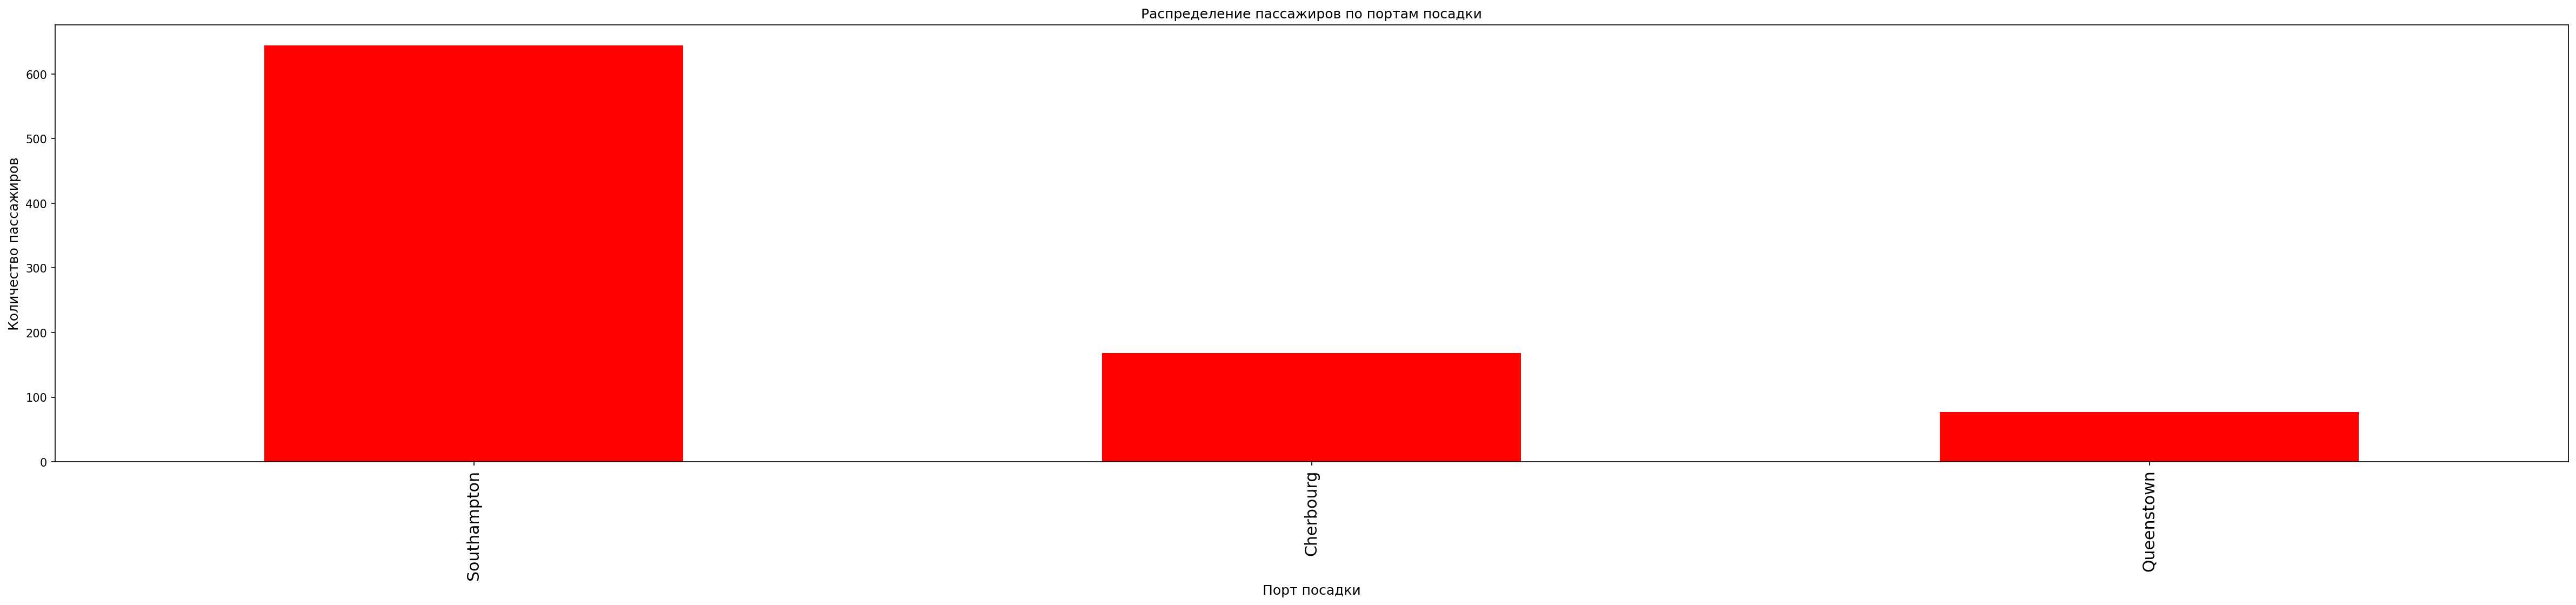

In [55]:
data['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}).value_counts().plot(kind='bar', color='red')
# Метод value_counts() считает сколько раз встречается S, C, Q соответственно. Метод plot() строит столбчатую диаграмму (bar plot) на основе полученных значений
plt.title('Распределение пассажиров по портам посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.show()

Из гистограммы видно, что посадки в Southampton'е сильно преобладают по количеству над количеством посадок в остальных портах. Для двух неизвестных ячеек посадки присвоим наиболее вероятный случай посадки - Порт S.

In [72]:
for i, emb in enumerate(data['Embarked']): # Метод enumerate позволяет переменной i присваивать индекс объекта строки, а в emb - сам объект.
# В данном случае emb - это значение ячейки в столбце Embarked
    if pd.isna(emb): data['Embarked'][i] = 'S' # Если emb является NaN, то этой ячейке присваивается порт S

In [73]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Видим, что пустых ячеек в столбце Embarked больше нет.

---

##**Выбор признаков**

---